
## Instructions:

This notebook  would provide details on your mid semester project. Carefully read and follow all instructions needed to complete the project. The project deadline is Tuesday, **10th November, 2020**.

**How to Submit:** Your final project should include a jupyter notebook that should be compiled with **no errors !**.  Also, include a well written report that will detail your findings from the project as well as lessons learnt. Both notebook and report should be pushed to your github pages and link shared with deborah.kanubala@acity.edu.gh and copy kwesi.cobbina@acity.edu.gh. Please do not forget to include a README.md to your repository.  


**Data and Task:** The data you would be working with is the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) and the goal is to build a robust regression model to predict house prices and use the mean squared error as an evaluation metric. I have already loaded the data and put it in a dataframe for your use.


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [74]:
import pandas as pd # import pandas for dataframes
from sklearn.datasets import load_boston # import data from sklearn
boston = load_boston() 
boston_df = pd.DataFrame(boston.data)
boston_df.columns= boston.feature_names
boston_df['price' ]= boston.target


### Sample Approach

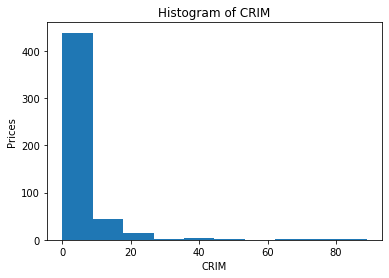

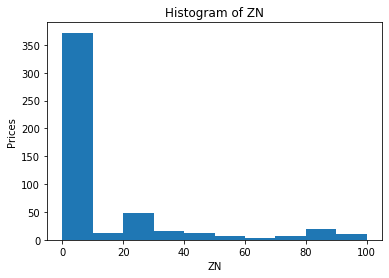

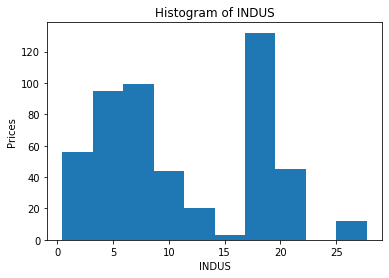

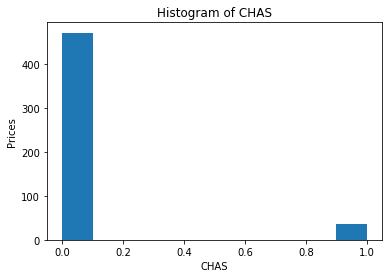

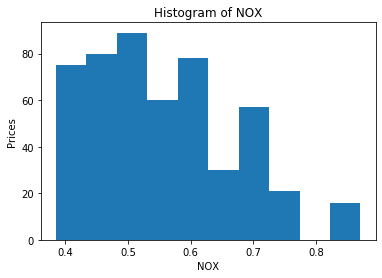

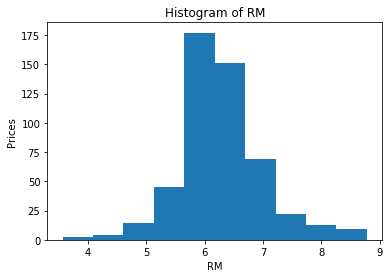

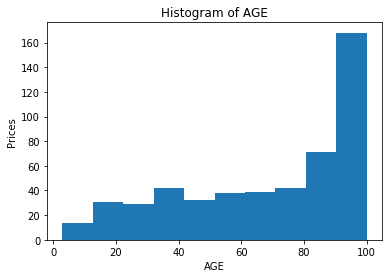

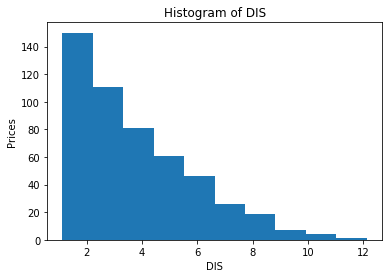

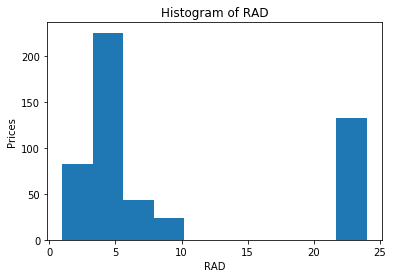

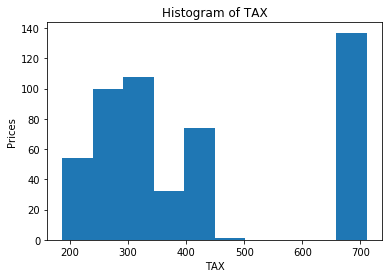

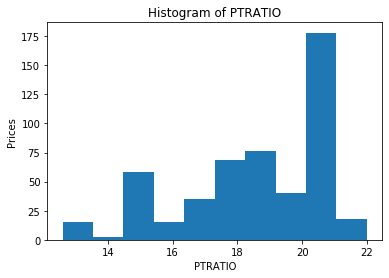

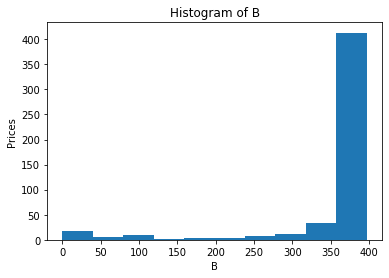

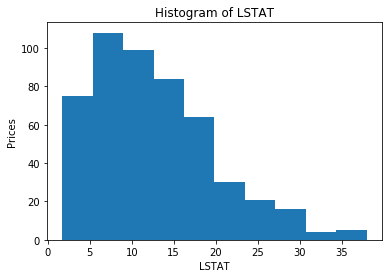

In [75]:
# Explorative Data Analysis

def plot_hist(data, cols, bins=10): # function to plot histograms  for columns
    for col in cols: # loop through the cols
        data[col].plot.hist(bins= bins) # histogram for each column
        plt.title("Histogram of" + " " + col) # include title
        plt.xlabel(col) # include labels for x axis
        plt.ylabel("Prices") # include labels for y axis
        plt.show()

        
num_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']    
plot_hist(boston_df, num_cols)

In [76]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
indus, nox,rm, tax, 

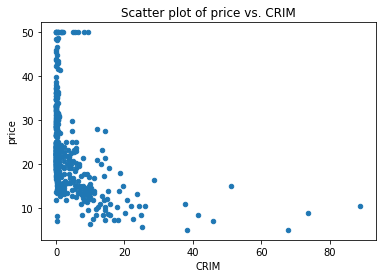

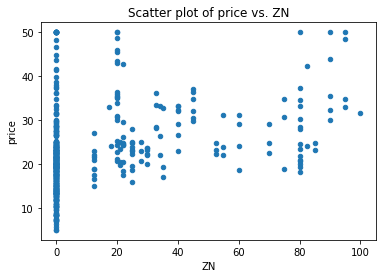

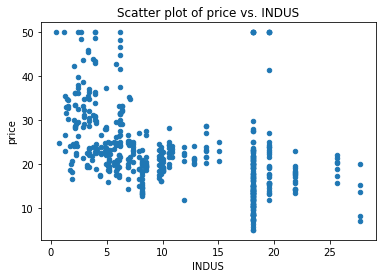

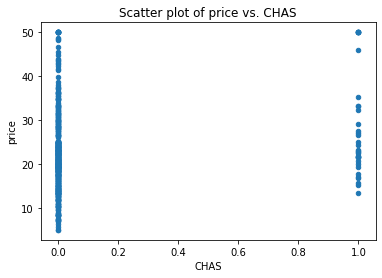

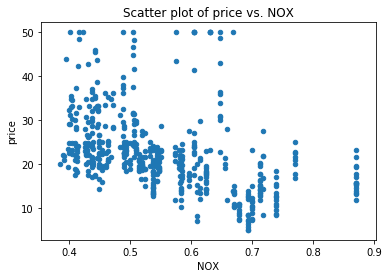

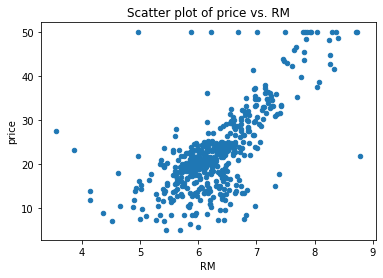

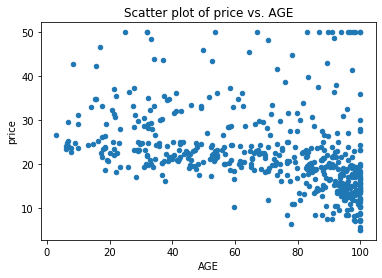

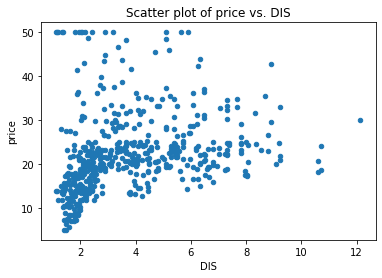

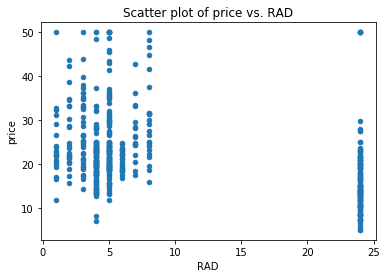

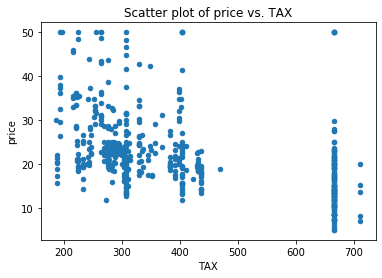

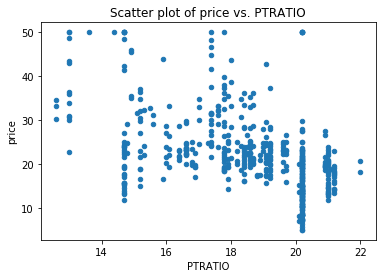

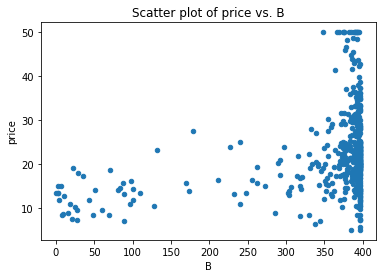

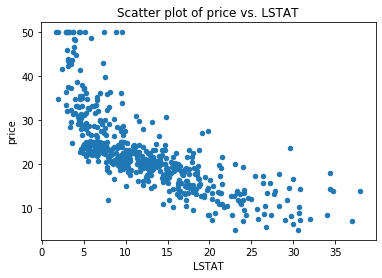

In [48]:
def plot_scatter(data, cols, col_y = 'price'):
    for col in cols:
        data.plot.scatter(x = col, y = col_y)
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # plot title
        plt.xlabel(col) # label for the x axis
        plt.ylabel(col_y)# label for y axis
        plt.show()

num_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']
plot_scatter(boston_df, num_cols) 

### Modelling 

In [49]:
# select cols for X and y
dropcols = ["price"]  
X = boston_df.drop(columns=dropcols, axis=1)
y = boston_df["price"]

In [50]:
# apply standard scalar
num_cols = list(X.columns)
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [51]:
#split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

In [52]:
# check the shapes of the train and test to ensure they are same
print("shape of Xtrain", X_train.shape)
print("shape of ytrain", y_train.shape)

print("shape of Xtest", X_test.shape)
print("shape of ytest", y_test.shape)


shape of Xtrain (379, 13)
shape of ytrain (379,)
shape of Xtest (127, 13)
shape of ytest (127,)


In [53]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [54]:
# print the intercept
print(model.intercept_)

22.580556185498054


In [61]:
#Check the coefficients of the columns
pd.DataFrame(model.coef_, X.columns,columns=['Coefficient'])


,Coefficient
CRIM,-0.983292
ZN,1.331094
INDUS,0.262494
CHAS,0.616226
NOX,-2.457955
RM,2.019595
AGE,0.194350
DIS,-3.095663
RAD,2.659910
TAX,-1.797361


In [60]:
#predict Xtest and calculate the MSE

predictions = model.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, predictions))


MSE: 21.8977653960495


Text(0, 0.5, 'predicted values')

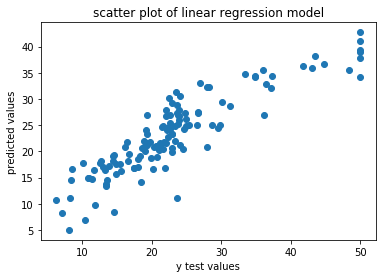

In [59]:
# Plot the ytest against the predictions
plt.scatter(y_test,predictions)
plt.title("scatter plot of linear regression model")
plt.xlabel("y test values")
plt.ylabel("predicted values")

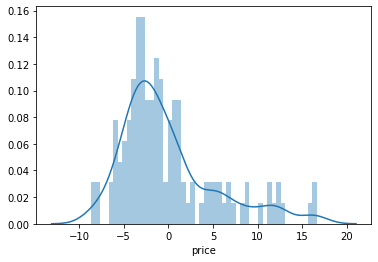

In [72]:
sns.distplot((y_test-predictions),bins=50);

### Advanced Techniques

In [62]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price'],
      dtype='object')

In [70]:
# drop more columns 

dropcols = ["price",'CRIM','INDUS', 'DIS', 'RAD',
       'PTRATIO', 'B']  
X = boston_df.drop(columns=dropcols, axis=1)
y = boston_df["price"]



In [71]:
# apply standard scalar
num_cols = list(X.columns)
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
#split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)
model = LinearRegression()
model.fit(X_train,y_train)
#predict Xtest and calculate the MSE

predictions = model.predict(X_test)
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MSE: 28.225894893368928
